In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import math

Data Analysis

In [2]:
#importing the data of systems 1 through 4 for Part 1 a
#os.chdir('/Users/francodelbalso/Downloads')
systems = np.genfromtxt('Part_1a_system1_to_4.csv', delimiter=',')

#seperating the data into each system, 6 trials of 6 measurements per system
system1 = [[],[],[],[],[],[]]
system2 = [[],[],[],[],[],[]]
system3 = [[],[],[],[],[],[]]
system4 = [[],[],[],[],[],[]]

for i in range(len(systems)):
    if i < 36:
        if i < 6:
            system1[0].append(systems[i])
        elif i < 12:
            system1[1].append(systems[i])
        elif i < 18:
            system1[2].append(systems[i])
        elif i < 24:
            system1[3].append(systems[i])
        elif i < 30:
            system1[4].append(systems[i])
        else:
            system1[5].append(systems[i])
    elif i < 72:
        if i < 42:
            system2[0].append(systems[i])
        elif i < 48:
            system2[1].append(systems[i])
        elif i < 54:
            system2[2].append(systems[i])
        elif i < 60:
            system2[3].append(systems[i])
        elif i < 66:
            system2[4].append(systems[i])
        else:
            system2[5].append(systems[i])
    elif i < 108:
        if i < 78:
            system3[0].append(systems[i])
        elif i < 84:
            system3[1].append(systems[i])
        elif i < 90:
            system3[2].append(systems[i])
        elif i < 96:
            system3[3].append(systems[i])
        elif i < 102:
            system3[4].append(systems[i])
        else:
            system3[5].append(systems[i])
    elif i < 144:
        if i < 114:
            system4[0].append(systems[i])
        elif i < 120:
            system4[1].append(systems[i])
        elif i < 126:
            system4[2].append(systems[i])
        elif i < 132:
            system4[3].append(systems[i])
        elif i < 138:
            system4[4].append(systems[i])
        else:
            system4[5].append(systems[i])

# system1 = np.transpose(system1)
# system2 = np.transpose(system2)
# system3 = np.transpose(system3)
# system4 = np.transpose(system4)



print(system1)


[[9.0, 45.0, 82.0, 119.0, 156.0, 191.0], [11.0, 46.0, 84.0, 123.0, 160.0, 197.0], [6.0, 41.0, 78.0, 114.0, 152.0, 189.0], [10.0, 45.0, 83.0, 119.0, 157.0, 194.0], [44.0, 83.0, 119.0, 158.0, 195.0, 231.0], [46.0, 84.0, 121.0, 159.0, 195.0, 233.0]]


In [3]:
#defining quantities
#masses in kg lengths in m
mass25 = 24.4373/1000
mass50 = 50.1393/1000
SpulleyM = 10.0231/1000
SpulleyR = (24.99/2)/1000
LpulleyM = 36.0243/1000
LpulleyR = (50/2)/1000
LowSteelM = 1346.7/1000
LowSteelR = (126.32/2)/1000
UpSteelM = 1354.8/1000
UpSteelR = (126.56/2)/1000
UpAlumM = 470.8/1000
UpAlumR = (126.25/2)/1000
washerM = 1.0306/1000
cylM = 25.48/1000
cylRout = (22.93/2)/1000
cylRin = (15.78/2)/1000
spindleM = 15.83/1000
g_montreal = 9.789

In [4]:
#defining uncertainties in quantities

mass25_unc = 0.0001/1000
mass50_unc = 0.0001/1000
SpulleyM_unc = 0.0001/1000
SpulleyR_unc = 0.01/1000
LpulleyM_unc = 0.0001/1000
LpulleyR_unc = 0.01/1000
LowSteelM_unc = 0.1/1000
LowSteelR_unc = 0.01/1000
UpSteelM_unc = 0.1/1000
UpSteelR_unc = 0.01/1000
UpAlumM_unc = 0.1/1000
UpAlumR_unc = 0.01/1000
washerM_unc = 0.0001/1000
cylM_unc = 0.01/1000
cylRout_unc = 0.01/1000
cylRin_unc = 0.01/1000
spindleM_unc = 0.01/1000
g_montreal_unc = 0.001
ruler_unc = 0.1/100 #cm to m
#For frequency data, uncertainty is set to 1 due to instrumental uncertainties (digital equipment)
frequency_unc = 1
time_unc = 0.5 #Uncertainty for time measured on phone (using stopwatch feature)

5.1

In [5]:
#Error propagation functions

def mult_div_unc(Z, aA, A, n, aB, B, m):
    return ( Z * ( (n*aA/A)**2 + (m*aB/B)**2 )**0.5 )
def mult_div_unc_3terms(Z, aA, A, n, aB, B, m, aC, C, l):
    return (Z * ( (n*aA/A)**2 + (m*aB/B)**2 + (l*aC/C)**2)**0.5)
def add_sub_unc(aA, n, aB, m):
    return ( ((n*aA)**2 + (m*aB)**2)**0.5 )
def add_sub_array_unc(array):
    sum = 0
    for i in range(len(array)):
        sum += array[i]**2
    return sum**0.5

In [6]:
#calculating the angular acceleration and its uncertainty
#here, 6 values will be used, but only 5 acceleratons will be calculated

def AverageAngularAcc(system, Rdisk, Rdisk_unc):
    bigsum = []
    bigsum_unc =[]
    for i in range(len(system[0])):      
        dt = 1 #we are taking 1 second timesteps
        sum = 0
        sum_unc = []
        for j in range(len(system[0])):
            if j == 0: #only need first value for vprev
                continue
            v = system[i][j]*0.002 #tangential velocity as defined in manual
            vprev = system[i][j-1]*0.002
            
            dw = (v-vprev)/Rdisk #change in angular velocity
        
            a = dw/dt
            
            v_unc = mult_div_unc(v, frequency_unc, system[i][j],1, 0.00001, 0.002, 1)
            vprev_unc = mult_div_unc(vprev, frequency_unc, system[i][j-1], 1, 0.00001, 0.002, 1)
            v_sub_vprev_unc = add_sub_unc(v_unc, 1, vprev_unc, 1)
            dw_unc = mult_div_unc(dw, v_sub_vprev_unc, (v - vprev), 1, Rdisk_unc, Rdisk, 1)
            a_unc = dw_unc #since dt = 1
            sum_unc.append(a_unc)
            
            sum += a
        accAverage = sum/(len(system[0])-1)
        accAverage_unc = add_sub_array_unc(sum_unc)/(len(system[0])-1)
        
        bigsum.append(accAverage)
        bigsum_unc.append(accAverage_unc)
        
             
    a_avg = np.mean(bigsum)#average of the 5 calculated accels
    
    a_std = np.std(bigsum) #standard deviation of a_avg
    a_std_err = a_std / (len(bigsum)-1)**0.5 #standard error of bigsum
    
    a_unc_inst = add_sub_array_unc(sum_unc) / len(system[0]) #instrumental uncertainty
   
    #final error, combining instrumental and statistical uncertainties
    a_unc = add_sub_unc(a_unc_inst, 1, a_std_err, 1) 
    
    return a_avg, a_unc

a1 = AverageAngularAcc(system1,UpSteelR, UpSteelR_unc)[0]
a2 = AverageAngularAcc(system2,UpSteelR, UpSteelR_unc)[0]
a3 = AverageAngularAcc(system3,UpSteelR, UpSteelR_unc)[0]
a4 = AverageAngularAcc(system4,UpSteelR, UpSteelR_unc)[0]

a1_unc = AverageAngularAcc(system1,UpSteelR, UpSteelR_unc)[1]
a2_unc = AverageAngularAcc(system2,UpSteelR, UpSteelR_unc)[1]
a3_unc = AverageAngularAcc(system3,UpSteelR, UpSteelR_unc)[1]
a4_unc = AverageAngularAcc(system4,UpSteelR, UpSteelR_unc)[1]


#moments of inertia for specific quantities
I_UpSteel = (UpSteelM*UpSteelR**2)/2
I_LowSteel = (LowSteelM*LowSteelR**2)/2
I_Spully = (SpulleyM*SpulleyR**2)/2
I_Lpully = (LpulleyM*LpulleyR**2)/2

#Uncertainties on moments of inertia for specific quantities
I_UpSteel_unc = mult_div_unc(2*I_UpSteel, UpSteelM_unc, UpSteelM, 1, UpSteelR_unc, UpSteelR, 2)
I_LowSteel_unc = mult_div_unc(2*I_LowSteel, LowSteelM_unc, LowSteelM, 1, LowSteelR_unc, LowSteelR, 2)
I_Spulley_unc = mult_div_unc(2*I_Spully, SpulleyM_unc, SpulleyM, 1, SpulleyR_unc, SpulleyR, 2)
I_Lpulley_unc = mult_div_unc(2*I_Lpully, LpulleyM_unc, LpulleyM, 1, LpulleyR_unc, LpulleyR, 2)

I4_array = [I_UpSteel, I_LowSteel, I_Lpully] #for I4_unc calculation

#calculating moments of inertia and its uncertainty
#will be adding I of pulley to I of disk since they both make up the rotating system
#will be using Icylinder = (MR**2)/2

I1 = I_UpSteel + I_Spully
I2 = I_UpSteel + I_Spully
I3 = I_UpSteel + I_Lpully
I4 = I_UpSteel + I_LowSteel + I_Lpully

I1_unc = add_sub_unc(I_UpSteel_unc, 1, I_Spulley_unc, 1)
I2_unc = add_sub_unc(I_UpSteel_unc, 1, I_Spulley_unc, 1)
I3_unc = add_sub_unc(I_UpSteel_unc, 1, I_Lpulley_unc, 1)
I4_unc = add_sub_array_unc(I4_array)


#the torque Ia and its uncertainty Ia_unc will be determined for each system

Ia1 = I1*a1
Ia2 = I2*a2
Ia3 = I3*a3
Ia4 = I4*a4

Ia1_unc = mult_div_unc(Ia1, I1_unc, I1, 1, a1_unc, a1, 1)
Ia2_unc = mult_div_unc(Ia2, I2_unc, I2, 1, a2_unc, a2, 1)
Ia3_unc = mult_div_unc(Ia3, I3_unc, I3, 1, a3_unc, a3, 1)
Ia4_unc = mult_div_unc(Ia4, I4_unc, I4, 1, a4_unc, a4, 1)

#Now determining the torque by the Fr = mgr method and its uncertainty
#m is mass, g is gravitational acceleration, r is radius of pulley

Fr1 = mass25*g_montreal*SpulleyR
Fr2 = mass50*g_montreal*SpulleyR
Fr3 = mass25*g_montreal*LpulleyR
Fr4 = mass25*g_montreal*LpulleyR

Fr1_unc = mult_div_unc_3terms(Fr1, mass25_unc, mass25, 1, g_montreal_unc, g_montreal, 1, SpulleyR_unc, SpulleyR, 1)
Fr2_unc = mult_div_unc_3terms(Fr2, mass50_unc, mass50, 1, g_montreal_unc, g_montreal, 1, SpulleyR_unc, SpulleyR, 1)
Fr3_unc = mult_div_unc_3terms(Fr1, mass25_unc, mass25, 1, g_montreal_unc, g_montreal, 1, LpulleyR_unc, LpulleyR, 1)
Fr4_unc = mult_div_unc_3terms(Fr1, mass25_unc, mass25, 1, g_montreal_unc, g_montreal, 1, SpulleyR_unc, LpulleyR, 1)

In [7]:
#printing angular accelerations
print(a1, '±', a1_unc)
print(a2, '±', a2_unc)
print(a3, '±', a3_unc)
print(a4, '±', a4_unc)

print('\nfor table')
print(round(a1, 3), '±', round(a1_unc, 3))
print(round(a2, 3), '±', round(a2_unc, 3))
print(round(a3, 3), '±', round(a3_unc, 3))
print(round(a4, 3), '±', round(a4_unc, 3))

1.1683522966708806 ± 0.021562706861522844
2.3440792246101982 ± 0.03465527354376547
2.146017699115044 ± 0.02480179687246858
1.088284871470712 ± 0.020827887080893774

for table
1.168 ± 0.022
2.344 ± 0.035
2.146 ± 0.025
1.088 ± 0.021


In [8]:
#printing torques for table
print(round(Ia1, 6), '±', round(Ia1_unc, 6))
print(round(Ia2, 6), '±', round(Ia2_unc, 6))
print(round(Ia3, 6), '±', round(Ia3_unc, 6))
print(round(Ia4, 6), '±', round(Ia4_unc, 6))

0.00317 ± 5.9e-05
0.00636 ± 9.4e-05
0.005845 ± 6.8e-05
0.005888 ± 0.004156


In [9]:
#printing torques by alternative method (Fr = mgr) for table
print(round(Fr1, 6), '±', round(Fr1_unc, 6))
print(round(Fr2, 6), '±', round(Fr2_unc, 6))
print(round(Fr3, 6), '±', round(Fr3_unc, 6))
print(round(Fr4, 6), '±', round(Fr4_unc, 6))

0.002989 ± 2e-06
0.006133 ± 5e-06
0.00598 ± 1e-06
0.00598 ± 1e-06


In [10]:
#Comparing the torques by %difference

#system1
percentDif1 = 100*abs(Fr1-Ia1)/np.mean([Fr1,Ia1])
print(percentDif1)

#system2
percentDif2 = 100*abs(Fr2-Ia2)/np.mean([Fr2,Ia2])
print(percentDif2)

#system3
percentDif3 = 100*abs(Fr3-Ia3)/np.mean([Fr3,Ia3])
print(percentDif3)

#system4
percentDif4 = 100*abs(Fr4-Ia4)/np.mean([Fr4,Ia4])
print(percentDif4)

5.881269143655651
3.6429352183563397
2.2843994657682436
1.5651439520488872


5.1.1

In [11]:
#importing time-distance measurements
distanceTime_raw = np.genfromtxt('distanceTimes_raw.csv', delimiter=',')
#distanceTime = np.transpose(distanceTime)
transposed = np.transpose(distanceTime_raw)

#array for the distances
distances_array = transposed[0]
distances = distances_array.tolist()

#array for the times
times_array = np.transpose(transposed[1:])
times = times_array.tolist()
print('distances', distances, '\ntimes', times, sep="\n")

distances
[15.0, 30.0, 45.0, 60.0, 75.0, 90.0]

times
[[4.46, 4.78, 4.48, 4.3], [6.43, 6.11, 6.14, 6.13], [7.48, 7.52, 7.68, 7.62], [8.88, 8.79, 8.76, 8.62], [9.73, 9.78, 9.82, 9.7], [10.79, 10.72, 10.77, 10.33]]


In [12]:
#Calculating mean times for each distance
distanceTime = []
distanceTime_stderr = []
for i in range(len(times)):
    AverageTime = np.mean(times[i]) #mean of time values for each distance
    distanceTime.append(AverageTime)
    
    AverageTime_stderr = np.std(times[i]) / (len(times[i]))**0.5 #standard error for times at each distance
    distanceTime_stderr.append(AverageTime_stderr) #creating list with the time std error values for each distance
    
print('distanceTime',distanceTime, sep='\n')
print('\ndistanceTime_stderr', distanceTime_stderr, sep='\n')

distanceTime
[4.505, 6.2025, 7.575, 8.7625, 9.7575, 10.6525]

distanceTime_stderr
[0.0867107259801232, 0.06589527676548594, 0.03960744879438708, 0.04668712349245799, 0.023014940799402552, 0.09396641687326372]


In [13]:
#decrease in potential energy
def dU(measures):
    dUs = []
    dUs_unc = []
    for i in range(len(measures)):
        U = mass25*g_montreal*(measures[i]/100)
        dUs.append(U)
        
        #error propagation for decrease in potential energy
        dUs_unc.append(mult_div_unc_3terms(U, mass25_unc, mass25, 1, g_montreal_unc, g_montreal, 1, ruler_unc, measures[i]/100, 1))
        
    return dUs, dUs_unc


#kinetic energy gained by the mass
def KEmass(distance, time, time_stderr):
    dKmasses = []
    finalVs = []
    dKmasses_unc = []
    finalVs_unc = []
    for i in range(len(distance)):
        dh = distance[i]/100 #cm to meters 
        t = time[i] 
        A = 2*dh/t**2 #a as defined in manual
        v = np.sqrt(2*A*dh) #final velocity
        finalVs.append(v)
        Kenergy = (mass25*v**2)/2 #formula for kinetic energy
        dKmasses.append(Kenergy) 
        
        #error propagation for kinetic energy
        time_err = add_sub_unc(time_unc, 1, time_stderr[i], 1)
        A_unc = mult_div_unc(A/2, ruler_unc, dh, 1, time_err, t, 2)
        v_unc = mult_div_unc((v**2)/2, A_unc, A, 1, ruler_unc, dh, 1)
        finalVs_unc.append(v_unc)
        Kenergy_unc = mult_div_unc(Kenergy*2, mass25_unc, mass25, 1, v_unc, v, 2)
        dKmasses_unc.append(Kenergy_unc)
    return finalVs, dKmasses, finalVs_unc, dKmasses_unc



#rotational energy gained by rotating disk
def REdisk(velocities, velocities_unc):
    REs = []
    W = [] #list of angular velocities
    A = [] #list of angular accelerations
    REs_unc = []
    W_unc = []
    A_unc = []
    I = (UpSteelM*UpSteelR**2)/2 + (SpulleyM*SpulleyR**2)/2
    I_unc = I_UpSteel_unc + I_Spulley_unc
    for i in range(len(velocities)):
        w = velocities[i]/SpulleyR #final angular velocity from the final velocity of mass and v = rw
        W.append(w)
        
        RotKenergy = (I*w**2)/2 #formula for rotational kinetic energy
        REs.append(RotKenergy) 
        
        #uncertainty for angular velocity
        w_unc = mult_div_unc(w, velocities_unc[i], velocities[i], 1, SpulleyR_unc, SpulleyR, 1)
        W_unc.append(w_unc)
        
        
        
        #uncertainty for rotational kinetic energy
        RotKenergy_unc = mult_div_unc(RotKenergy*2, I_unc, I, 1, w_unc, w, 2)
        REs_unc.append(RotKenergy_unc)
        
        #calculating angular acceleration
        if i==0:
            continue
        else:
            a = w - W[i-1]
            A.append(a)
            #uncertainty for angular acceleration
            a_unc = add_sub_unc(w_unc, 1, W_unc[i-1], 1)
            A_unc.append(a_unc)
        
    return REs, REs_unc, W, W_unc, A, A_unc


#getting total energy gained
def Egained(KE,RE, KE_unc, RE_unc): 
    gained = []
    gained_unc = []
    for i in range(len(KE)):
        gained.append(KE[i]+ RE[i])
        
        #error propagation for total energy gained
        energy_unc = add_sub_unc(KE_unc[i], 1, RE_unc[i], 1)
        gained_unc.append(energy_unc)
    return gained, gained_unc

    
#percent difference between E gained and potential lost
def percentDiff(U,E):
    percents = []
    for i in range(len(U)):
        diff = 100*abs(U[i]-E[i])/np.mean([U[i],E[i]]) #percent difference formula
        percents.append(diff)
    return percents


potentials, potentials_unc = dU(distances)
velocities, kineticsMass, velocities_unc, kineticsMass_unc = KEmass(distances, distanceTime, distanceTime_stderr) 
rotEnergies, rotEnergies_unc, angularV, angularV_unc, angularA, angularA_unc = REdisk(velocities, velocities_unc)
Egained, Egained_unc = Egained(kineticsMass,rotEnergies, kineticsMass_unc, rotEnergies_unc)
pctDiffs = percentDiff(potentials,Egained)



print('potential\n', potentials, '\npotential uncertainty\n', potentials_unc)
print('\nvelocities\n', velocities, '\nvelocities uncertainty\n', velocities_unc)
print('\nAngular velocity\n', angularV, '\nAngular veolicty uncertainty\n', angularV_unc)

print('\nEnergy gained\n', Egained)
print('\nPercent difference\n',pctDiffs)

potential
 [0.035882509455, 0.07176501891, 0.10764752836500001, 0.14353003782, 0.179412547275, 0.21529505673000002] 
potential uncertainty
 [0.0002392448576575558, 0.00023932922169523694, 0.00023946976237795476, 0.0002396663808795528, 0.00023991893932929538, 0.0002402272612929845]

velocities
 [0.06659267480577137, 0.09673518742442563, 0.11881188118811882, 0.1369472182596291, 0.15372790161414296, 0.16897441915043418] 
velocities uncertainty
 [0.0002503117416785565, 0.0003808352060403822, 0.00046767158052646833, 0.0005376911637419652, 0.0006063868110758956, 0.0006820469889501745]

Angular velocity
 [5.329545802782823, 7.741911758657515, 9.508753996648165, 10.960161525380482, 12.303153390487633, 13.52336287718561] 
Angular veolicty uncertainty
 [0.02048200028085978, 0.03110241866345783, 0.03819450545190692, 0.04391740215927378, 0.04951917157447606, 0.055648223269409214]

Energy gained
 [0.038589044900797176, 0.08142918081200969, 0.12283746785417919, 0.1631990179367784, 0.2056442208012142

In [18]:
#least squares fit on potential lost vs kinetic energy gained

def leastSquares(x,y, xerror, yerror, Xaxtit, Yaxtit):
    #getting my sums
    sumX = 0
    for i in x:
        sumX += i
    
    sumX2 = 0
    for i in x:
        sumX2 += i**2
    
    sumY = 0
    for i in y:
        sumY += i
    
    sumXY = 0
    for i in range(len(x)):
        sumXY += x[i]*y[i]
    
    N = len(x)
    delta = (N*sumX2) - (sumX)**2
    
    #determining parameters m (gradient) and c (intercept)
    c = (sumX2*sumY - sumX*sumXY)/delta
    
    m = (N*sumXY - sumX*sumY)/delta
    
    #the common uncertainty aCU
    #first need sum involving m and c
    sumMC = 0
    for i in range(len(x)):
        sumMC += (y[i] - m*x[i] - c)**2
    
    aCU = np.sqrt((1/(N-2))*sumMC)
    
    #now error on m (aM) and error on c (aC)  
    aM = aCU*np.sqrt(N/delta)
    aC = aCU*np.sqrt(sumX2/delta)
    
    
    
    #finally plotting
    lineX = np.linspace(x[0],x[-1], 200)
    lineY = m*lineX + c
    
    minlineY = (m-aM)*lineX + (c-aC)
    maxlineY = (m+aM)*lineX + (c+aC)
    
    #PLOT
    fig = plt.figure(figsize = (5, 5), dpi=100)
    print(fig)
    
    #Plotting data and model
    axes = fig.add_axes((0,0.4,1,1))
    axes.errorbar(x, y, xerr=xerror, yerr=yerror, color='black', fmt='.')
    axes.plot(lineX, lineY, color='blue')
    axes.plot(lineX, minlineY, color='green', linestyle = ':')
    axes.plot(lineX, maxlineY, color='green', linestyle = ':')

    #Plotting residuals on extended y axis
    residuals = fig.add_axes((0,0,1,0.4))
    resids = []
    for n in range(len(x)):
        resids.append(m*x[n]+c - y[n])
    residuals.errorbar(x, resids, xerr=xerror, yerr=yerror, color='black', fmt='.')
    residuals.axhline(y=0, color = 'blue', linestyle = '--', dash_capstyle = 'projecting')
    
    #Naming axes
    axes.set_ylabel(Yaxtit)
    residuals.set_ylabel('Residual')
    residuals.set_xlabel(Xaxtit)
   
    fig.savefig('UEnergy_over_TotalEnergy.png')
    plt.show()
    print('Line of best fit: \ny = ', m, 'x + ', c, sep='')
    print('\nSlope = ', m, ' ± ', aM, sep='')
    print('Intercept = ', c, ' ± ', aC, sep='')

Figure(500x500)


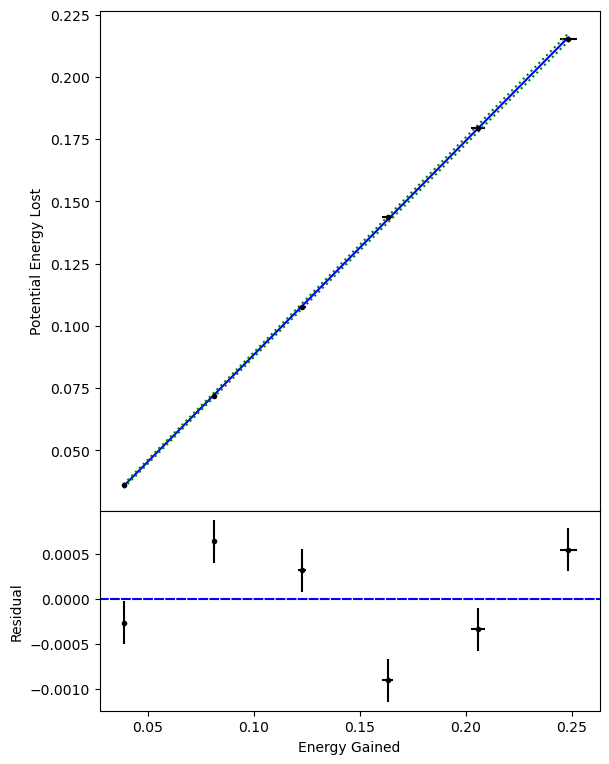

Line of best fit: 
y = 0.8587447857782315x + 0.0024795655411586175

Slope = 0.8587447857782315 ± 0.0038512159175815817
Intercept = 0.0024795655411586175 ± 0.0006167233134668702


In [19]:
#Plotting the graph with error bars, line of best fit (with min and max of best fit), and residuals
leastSquares(Egained, potentials, Egained_unc, potentials_unc, 'Energy Gained', 'Potential Energy Lost')